<a href="https://colab.research.google.com/github/alekswheeler/datasci_home_work/blob/main/Especifica%C3%A7%C3%A3o_2024_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Prático

O objetivo geral deste trabalho é praticar os conceitos discutidos em sala de aula, principalmente: representação e pré-processamento de dados textuais; redução de dimensionalidade e algoritmos de agrupamento.

## Conjunto de Dados

Para esse trabalho utilizaremos um conjunto de dados de filmes. Os dados foram obtidos de várias fontes, incluindo IMDB.

O conjunto de dados que vocês deverão usar encontra-se no AVA da disciplina. Os dados estão organizados um arquivo (`.csv`) com as seguintes colunas:

* **genres** - gêneros a que um filme pertence. Veja que um filme pode estar associado a mais de um gênero (`str`);
* **sinopse** - sinopse do filme (`str`);
* **startYear** - ano de lançamento do filme (`int`);
* **primaryTitle** - título do filme (`str`);
* **runtimeMinutes** - duração do filme, em minutos (`int`);
* **averageRating** - média das avaliações do filme (`float`);
* **numVotes** - número de avaliações do filme (`int`);
* **actors_names** - atores/atrizes principais (`str`);
* **directors_names** - diretores(as) do filme (`str`).

**Observação:** esse conjunto de dados é uma versão transformada dos dados originais. Por exemplo, gêneros muito populares ou raros foram removidos.

**ATENÇÃO**
É possível que seu computador não consiga lidar com o conjunto de dados completo. Se for o caso, faça uma amostra aleatória de filmes do conjunto de dados. Deixe claro o processo de amostragem, o tamanho das amostras finais que considerou no trabalho e as especificações do computador utilizado.

Os comandos abaixo mostram como os dados podem ser obtidos e carregados em um `DataFrame`.

In [10]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg' -O filmes.csv



--2025-02-17 23:49:15--  https://docs.google.com/uc?export=download&id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg
Resolving docs.google.com (docs.google.com)... 172.253.63.100, 172.253.63.113, 172.253.63.102, ...
Connecting to docs.google.com (docs.google.com)|172.253.63.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg&export=download [following]
--2025-02-17 23:49:15--  https://drive.usercontent.google.com/download?id=1AeYgV89TmYvNC__RDXr8hS0P6WOsChWg&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.163.132, 2607:f8b0:4004:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.163.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11380332 (11M) [application/octet-stream]
Saving to: ‘filmes.csv’

filmes.csv          100%[===================>]  10.85M  --.-KB/s    in 

In [11]:
import pandas as pd
df = pd.read_csv("filmes.csv")

In [12]:
df.head()
a = df['sinopse']

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
D = ["É escória échange", "this is 1980  a another people and", "example example example"]

vectorizer = TfidfVectorizer(token_pattern=r'\b[a-zA-ZÀ-ÖØ-öø-ÿ]+\b', stop_words='english')
vectorizer.fit_transform(D)
vectorizer.get_feature_names_out()

array(['escória', 'example', 'people', 'é', 'échange'], dtype=object)

## Objetivo

Vocês deverão utilizar aprendizado não supervisionado (neste caso, agrupamento) para investigar se há relação entre a **sinopse** de um filme e o(s) **gênero(s)** a que pertence.

De forma mais específica, vocês deverão agrupar os filmes de acordo suas sinopses e, após isso, verificar a distribuição dos gêneros em cada grupo. Ou seja, se os filmes pertencentes ao mesmo grupo possuem o(s) mesmo(s) gênero(s) ou se as distribuições de gêneros de grupos diferentes são distintas.

## Trabalho

Antes de fazer o pré-processamento de dados a ideia é que vamos dividir a base de dados em pedaços menores mantendo a proporção da base de dados original ([StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html)).

In [14]:
X = df.drop(columns=['genres'])
y = df['genres']

In [16]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

SEED = 42
np.random.seed(SEED)

# Dividindo em 10 Folds estratificados
skf = StratifiedKFold(n_splits=3)

# Guardar todos os folds
folds = list(skf.split(X, y))

# Escolher um fold aleatório
random_fold = np.random.RandomState(SEED).choice(len(folds))

# Separar os dados do fold escolhido
train_idx, test_idx = folds[random_fold]
rand_X, rand_y = X.iloc[test_idx], y.iloc[test_idx]

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


In [17]:
# Pegando apenas a característica sinopse da amostra
rand_X = rand_X['sinopse']

### Criando matriz de tokens para trabalhar com TF-IDF

In [21]:
!pip install -U spacy
!pip install matplotlib scipy scikit-learn
!pip install langdetect

# Baixando os modelos
!python -m spacy download en_core_web_sm
!python -m spacy download es_core_news_sm
!python -m spacy download de_core_news_sm
!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 25.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=e5bf527ea0cbf20dee809af0c9c04d2f3533c883d511cbb2f8dc2b9d5880e392
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
  Using cached https://github.com/explosion/spacy-models/releases/download/es_core_news_sm-3.8.0/es_

In [22]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from langdetect import detect
import spacy
import nltk

# Baixando as stop words do NLTK (apenas na primeira execução)
nltk.download('stopwords')

# Combina todas as stop words de todos os idiomas disponíveis no NLTK
all_stop_words = set()
for lang in stopwords.fileids():
    all_stop_words.update(stopwords.words(lang))

# Inicializando o PorterStemmer
stemmer = PorterStemmer()

# Carregando modelos do SpaCy para diferentes idiomas
spacy_models = {
    'en': spacy.load('en_core_web_sm'),
    'es': spacy.load('es_core_news_sm'),
    'de': spacy.load('de_core_news_sm'),
    'fr': spacy.load('fr_core_news_sm')
}

def tokenize_stem(text):
    try:
        # Detecta o idioma do texto
        lang = detect(text)
    except:
        lang = 'en'  # Padrão para inglês caso não detecte

    # Usa o modelo SpaCy correspondente ao idioma
    nlp = spacy_models.get(lang, spacy_models['en'])
    doc = nlp(text)

    # Tokenização, Lematização e Remoção de Stop Words (tudo junto com SpaCy)
    tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

    # Remove as stop words multilíngues
    tokens = [word for word in tokens if word not in all_stop_words]

    # Aplica stemming usando o PorterStemmer
    tokens = [stemmer.stem(word) for word in tokens]

    return tokens


# Criando o TfidfVectorizer com Stemming e Remoção de Números
vectorizer = TfidfVectorizer(
    min_df = 0.001,
    tokenizer=tokenize_stem,  # Usa a função personalizada
    token_pattern=None  # Ignorado quando usamos tokenizer personalizado
)

# Ajusta o vectorizer no conjunto completo (ou apenas no treino, se preferir)
vectorizer.fit(rand_X)

# Transforma os dados de rand_X
rand_X_tfidf = vectorizer.transform(rand_X)

tfidf_dataframe = pd.DataFrame(rand_X_tfidf.todense(), columns = vectorizer.get_feature_names_out())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
tfidf_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10119 entries, 0 to 10118
Columns: 2472 entries, abandon to zone
dtypes: float64(2472)
memory usage: 190.8 MB


In [24]:
# texts = [
#     "The cat is sleeping on the sofa.",
#     "A cat sleeps peacefully on the couch lvare	çigdem	échang	émigré",
#     "Dogs are playing outside while the cat sleeps inside.",
#     "The quick brown fox jumps over the lazy dog."
# ]

# # Inicializando o TfidfVectorizer com a função de pré-processamento personalizada
# vectorizer = TfidfVectorizer(tokenizer=tokenize_stem, lowercase=False)
# tfidf_matrix = vectorizer.fit_transform(texts)

# # Exibindo as features (palavras relevantes) e a matriz TF-IDF
# print("Features:", vectorizer.get_feature_names_out())
# print("\nTF-IDF Matrix:")
# print(tfidf_matrix.toarray())

In [25]:
tfidf_dataframe.head()

,abandon,abduct,abil,aboard,abroad,abus,academi,accept,accid,accident,...,yard,year,yearn,york,young,youngster,youth,yu,zombi,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Usando PCA
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.datasets import load_wine
# import pandas as pd

# pca = PCA(n_components = 4000)
# pca.fit(tfidf_dataframe)

# #@title
# import matplotlib.pyplot as plt
# import numpy as np
# fig = plt.figure(figsize=(7, 5))
# plt.plot([i for i in range(1, pca.n_components + 1)], np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel(r'$k$ - Número de componentes principais')
# plt.ylabel(r'$f(k)$ - Fração cumulativa da variância explicada');

In [28]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA(n_components = 2400)
X2 = pca.fit_transform(tfidf_dataframe)

hierarchical_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
# labels = hierarchical_model.fit_predict(X2)

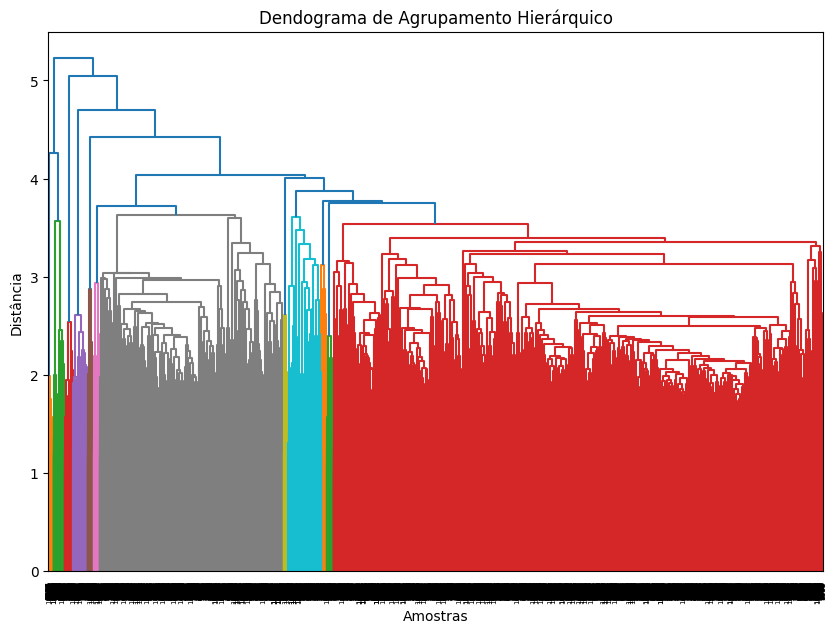

In [29]:
# Calculando as ligações para o dendograma
Z = linkage(X2, method='ward')

# Plotando o dendograma
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendograma de Agrupamento Hierárquico')
plt.xlabel('Amostras')
plt.ylabel('Distância')
plt.show()

## Metodologia

Para atingir o objetivo proposto, vocês deverão seguir ao menos os seguintes passos:
1. Pré-processamento dos dados textuais;
2. Construção da matriz de TF-IDF;
3. Redução de dimensionalidade, via PCA (Leia também sobre o *Truncated SVD*: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html);
4. Aplicação de ao menos dois algoritmos de agrupamento vistos na disciplina;
5. Validação da metodologia utilizada;
6. Interpretação dos resultados.

**PS:** essas são as exigências mínimas. Caso vocês queiram fazer/propor algo extra, será permitido (e pode ajudar na nota se a proposta for relevante).

## Resultados esperados

Dois tipo de resultados são esperados: validação e análise.

### Resultados de validação

O trabalho deve conter resultados mostrando que os algoritmos (e respectivos parâmetros) foram escolhidos e utilizados de forma correta. Entre os pontos importantes:
1. Como foi escolhido o número de componentes principais para o PCA? O número de componentes principais tem um impacto significativo nos resultados? É necessário usar PCA neste trabalho?
2. Como o número de grupos para cada algoritmo de agrupamento foi definido? A escolha do algoritmo de agrupamento impacta significativamente os resultados? E o número de grupos?

Fará parte da avaliação a forma que escolherem para validar a metodologia. Vocês podem recorrer a visualizações interessantes, medidas internas...

### Análise

Após validar e entender os resultados (e se convencerem que estão corretos e fazem sentido), você deve responder as perguntas principais:
- Há diferença nas distribuições de gêneros dos filmes em grupos diferentes?
- Há relação entre as sinopses dos filmes e os respectivos gêneros?

- **Opcional, pontuação extra:** se, além das sinopses, você também considerar as demais informações no conjunto de dados (avaliações, atores/atrizes, diretores(as), título, ano e duração) para os algoritmos de agrupamento, é possível encontrar uma melhor associação entre os grupos e os gêneros dos filmes?
Novamente, recorra às ferramentas que já vimos no curso para responder essa pergunta: visualizações, medidas externas... **soluções que tiverem achados interessantes nessa parte do trabalho ganharão ponto extra**.

## Observações importantes

1. Durante a fase de agrupamento, apenas a informação da sinopse deve ser utilizada. A informação de **gênero dos filmes** deve ser usada apenas após a fase de agrupamento para validar e analisar os resultados.
2. Vocês podem usar todas as bibliotecas Python que venho mostrando em aula. Caso queiram usar algo muito diferente (por exemplo, alguma biblioteca de uso comercial), perguntem ao professor antes (em nosso fórum do AVA).
3. Lembrem-se que este trabalho vale 30% da nota do semestre. Vocês serão avaliados pela:
  - Qualidade dos resultados quantitativos;
  - Escolha e condução da metodologia;
  - Uso de visualizações informativas e bem feitas;
  - Explicação dos passos seguidos e das decisões tomadas;
  - Justificativas para as decisões tomadas;
  - Análise dos resultados;
  - Conclusões.
4. Qualquer colaboração, entre grupos ou de fontes externas, deve ser citada e mencionada no trabalho. **NÃO HAVERÁ TOLERÂNCIA PARA COLABORAÇÕES INDEVIDAS!**

## Grupos

- **Graduação:** até 3 pessoas
- **Pós-graduação:** individual

## Entrega

- **Linguagem de programação:** Python
- **O que entregar:** um *Jupyter Notebook*, contendo texto, código e resultados. Deve ser possível que o professor execute o seu código, mas o arquivo ``.ipynb`` submetido já deve conter todos os resultados (i.e., deve ser possível corrigir seu trabalho apenas abrindo o arquivo). Apenas um integrante do grupo deve fazer a submissão no AVA. Lembrem-se de colocar a informação de todos os integrantes do grupo (nome, matrícula e e-mail).

## Dúvidas?

Postem em nosso fórum do AVA!

# Referências

- Lista de [stopwords](https://github.com/igorbrigadir/stopwords/blob/21fb2ef149216e3c8cac097975223604ae1e2310/en/rouge_155.txt) que encontramos na documentação do Scikitlearn
-